# Reading Data & Statistics


In [1]:
# Readingdata
import pandas as pd
dataset=pd.read_csv("newdata.csv")

In [2]:
# Size
print(dataset)

                                                   text  label
0                                This song is LEGANDARY      1
1                                             Nice song      1
2     billion views face with raised eyebrow this so...      1
3                                            Nice video      1
4     Who else imagined themselves being Justin beib...      1
...                                                 ...    ...
1051                      At it says I be watching porn      3
1052                            I don t like you at all      3
1053                                         disturbing      3
1054            I came here only for dislake this video      3
1055  we don t wanna see them do unholy things like ...      3

[1056 rows x 2 columns]


<FreqDist with 3 samples and 1056 outcomes>


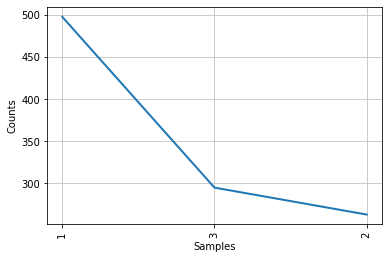

In [3]:
# Label count of type
from nltk.probability import FreqDist
fdist = FreqDist(dataset.label)
print(fdist)
fdist.plot(3)

In [4]:
# StatisticsFunction

def stat(data):
  new_corpus = []
  for review in data:
      review = review.split()
      new_corpus.extend(review) 
  fdist = FreqDist(new_corpus)
  print(fdist)
  fdist.plot(20)
def tail_stat(data):
  new_corpus = []
  for review in data:
      review = review.split()
      new_corpus.extend(review) 
  fdist = FreqDist(new_corpus)
  a = fdist.hapaxes()
  fdist2 = FreqDist(a)
  print(fdist2)
  fdist2.plot(20)

<FreqDist with 1860 samples and 10676 outcomes>


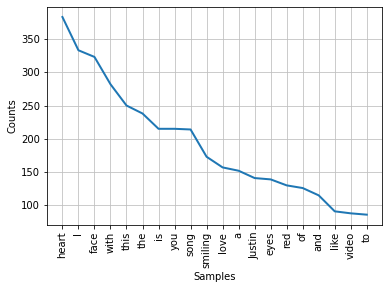

In [5]:
# Text count of word
stat(dataset.text)


# Preprocessing

In [6]:
# Cleaning data
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

for review in dataset.values[:,0]:
    review = re.sub("[^a-zA-Z]", " ", review)
    review = re.sub(r'([A-Z])\1+', lambda m: m.group(1),review,flags=re.IGNORECASE)
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
print(dataset.text[1000])
print(corpus[1000])

this was the justin i hated at first sight before knowing him
justin hate first sight know


<FreqDist with 1281 samples and 7081 outcomes>


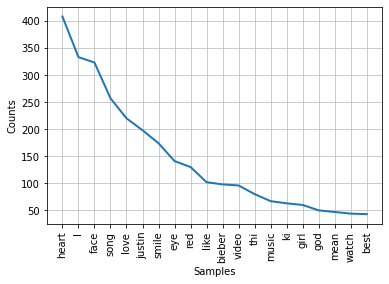

In [8]:
stat(corpus)

<FreqDist with 677 samples and 677 outcomes>


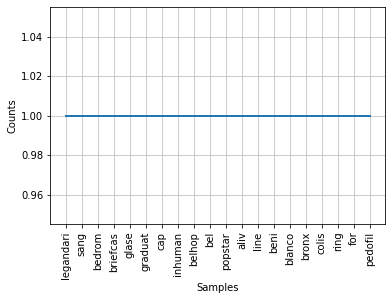

In [9]:
tail_stat(corpus)

In [10]:
# Convert to vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)
X = X.todense()

In [11]:
print(X.shape)

(1056, 1221)


In [12]:
# parameter adjustment
cv = CountVectorizer(max_features=1000)
X = cv.fit_transform(corpus)
X = X.todense()

In [13]:
print(X.shape)

(1056, 1000)


# Building Model

In [14]:
# Trainning model with cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

Y = dataset.iloc[:,1].values
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
sss.get_n_splits(X,Y)

maxscore_1 = 0
maxscore_2 = 0
maxscore_3 = 0
trainset1 = []
testset1 = []
trainset2 = []
testset2 = []
trainset3 = []
testset3 = []
for train_index, test_index in sss.split(X,Y):
      X_train, X_test = X[train_index], X[test_index]
      Y_train, Y_test = Y[train_index], Y[test_index]

      model_1 = LogisticRegression(random_state=0)
      model_1.fit(X_train, Y_train)
    
      model_2 = SVC(kernel='linear')
      model_2.fit(X_train, Y_train)

      model_3 = MultinomialNB()
      model_3.fit(X_train, Y_train)
      
      if (maxscore_1 < model_1.score(X_test, Y_test)):
          maxscore_1 = model_1.score(X_test, Y_test)
          trainset1 = [train_index] 
          testset1 = [test_index]
      if (maxscore_2 < model_2.score(X_test, Y_test)):
          maxscore_2 = model_2.score(X_test, Y_test)
          trainset2 = [train_index]
          testset2 = [test_index]
      if (maxscore_3 < model_3.score(X_test, Y_test)):
          maxscore_3 = model_3.score(X_test, Y_test)
          trainset3 = [train_index]
          testset3 = [test_index]  
      print("Logistic")
      print(model_1.score(X_train, Y_train))
      print(model_1.score(X_test, Y_test))
      
      print("Support Vector Machine")
      print(model_2.score(X_train, Y_train))
      print(model_2.score(X_test, Y_test))

      print("MultinomialNB")
      print(model_3.score(X_train, Y_train))
      print(model_3.score(X_test, Y_test))
      print("===============")

Logistic
0.9727488151658767
0.8113207547169812
Support Vector Machine
0.9739336492890995
0.8207547169811321
MultinomialNB
0.9229857819905213
0.8066037735849056
Logistic
0.9691943127962085
0.7830188679245284
Support Vector Machine
0.9774881516587678
0.7783018867924528
MultinomialNB
0.9253554502369669
0.7641509433962265
Logistic
0.9774881516587678
0.7311320754716981
Support Vector Machine
0.9834123222748815
0.7311320754716981
MultinomialNB
0.9312796208530806
0.7594339622641509
Logistic
0.9727488151658767
0.8113207547169812
Support Vector Machine
0.9786729857819905
0.7783018867924528
MultinomialNB
0.919431279620853
0.7971698113207547
Logistic
0.9691943127962085
0.7924528301886793
Support Vector Machine
0.981042654028436
0.7594339622641509
MultinomialNB
0.9253554502369669
0.8018867924528302
Logistic
0.9680094786729858
0.7735849056603774
Support Vector Machine
0.9739336492890995
0.7641509433962265
MultinomialNB
0.9206161137440758
0.7830188679245284
Logistic
0.9715639810426541
0.792452830188

In [15]:
print(testset1)
print(testset2)
print(testset3)


[array([ 730,  572,  591,  358,  127,  974,  911,  285,  404,  581,  544,
        731,  211,  520,  458, 1019,  954,  969,  735,  739,  877,  823,
         25,  910,  452,   39,  876,  420,  968,  630,  941,  915,  174,
       1050,  840,   28,  589,  742,  942,  856,  621,  918,   31,  901,
        881,  468,  770,    9,  192,  119,  549,  798,  265,  147,   84,
        681,  481,  716,  185,  845,  496,  643,  449,  323,  183,  121,
        820,  243,  837, 1053, 1054,  997,   91,  356,  290,  702,  431,
        557, 1045,  896,  888,  195,  873,  530,   70,  244, 1035,  596,
        273,  904,  359,  774,  484,  822,  905,  594,  131,  919,  337,
        844,  828,  670,  423,  585,  335,  277,  809,  105,  662,  676,
        692,  761, 1002,  446,  661,  388,  571,  677,  165,  177,  696,
        338,  242,  808,  607,  613,  801,  835,  976,  292,  841,  117,
        389,  861,   47,  472,  203,  752,  128,  524,  703,  683,  617,
        444,   88,  688,  398,  587,  983,  465,  

In [16]:
# Building Model
X_train1, X_test1= X[trainset1], X[testset1]
Y_train1, Y_test1= Y[trainset1], Y[testset1]

X_train2, X_test2= X[trainset2], X[testset2]
Y_train2, Y_test2= Y[trainset2], Y[testset2]

X_train3, X_test3= X[trainset3], X[testset3]
Y_train3, Y_test3= Y[trainset3], Y[testset3]

model_1 = LogisticRegression(random_state=0)
model_1.fit(X_train1, Y_train1)   
model_2 = SVC(kernel='linear')
model_2.fit(X_train2, Y_train2)
model_3 = MultinomialNB()
model_3.fit(X_train3, Y_train3)

/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:195: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = N.ndarray.__getitem__(self, index)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Result

In [17]:
# AccuracyScore
print("Logistic")
print(model_1.score(X_test1, Y_test1))
print("Support Vector Machine")
print(model_2.score(X_test2, Y_test2))
print("MultinomialNB")
print(model_3.score(X_test3, Y_test3))

Logistic
0.8113207547169812
Support Vector Machine
0.8207547169811321
MultinomialNB
0.8301886792452831


In [18]:
# Classification Report
y_pred_1 = model_1.predict(X_test1)
y_pred_2 = model_2.predict(X_test2)
y_pred_3 = model_3.predict(X_test3)
from sklearn.metrics import classification_report
print("Logistic")
print(classification_report(Y_test1, y_pred_1, labels=[1, 2, 3]))
print("Support Vector Machine")
print(classification_report(Y_test2, y_pred_2, labels=[1, 2, 3]))
print("MultinomialNB")
print(classification_report(Y_test3, y_pred_3, labels=[1, 2, 3]))

Logistic
              precision    recall  f1-score   support

           1       0.87      0.85      0.86       100
           2       0.76      0.70      0.73        53
           3       0.77      0.85      0.81        59

    accuracy                           0.81       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.81      0.81      0.81       212

Support Vector Machine
              precision    recall  f1-score   support

           1       0.87      0.86      0.86       100
           2       0.77      0.70      0.73        53
           3       0.78      0.86      0.82        59

    accuracy                           0.82       212
   macro avg       0.81      0.81      0.81       212
weighted avg       0.82      0.82      0.82       212

MultinomialNB
              precision    recall  f1-score   support

           1       0.88      0.91      0.89       100
           2       0.75      0.81      0.78        53
           3       0.82      

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


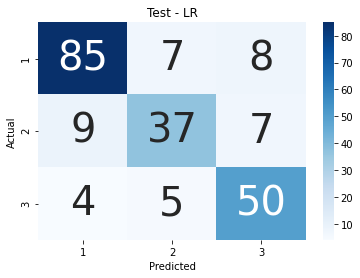

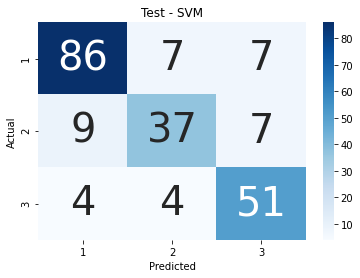

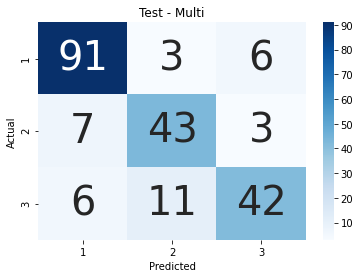

In [19]:
# Confusion matrix
#Calculate Confusion Matrix on Test set
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
cm_test_log = confusion_matrix(Y_test1, y_pred_1)
cm_test_svm = confusion_matrix(Y_test2, y_pred_2)
cm_test_multi = confusion_matrix(Y_test3, y_pred_3)
#Plot Confusion Matrix on Test set
#plot_confusion_matrix(classifier,X_train,Y_train)
sb.heatmap(cm_test_log, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 40},yticklabels=["1", "2", "3"],xticklabels=["1", "2", "3"])
plt.title("Test - LR")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
sb.heatmap(cm_test_svm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 40},yticklabels=["1", "2", "3"],xticklabels=["1", "2", "3"])
plt.title("Test - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
sb.heatmap(cm_test_multi, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 40},yticklabels=["1", "2", "3"],xticklabels=["1", "2", "3"])
plt.title("Test - Multi")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()